In [4]:
%matplotlib inline

import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
import warnings
warnings.filterwarnings('ignore')

# Applied Machine Learning

## Convolutional neural networks

### How do we apply neural nets on images?

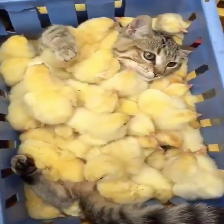

In [5]:
img_path = 'picture.png'
img = image.load_img(img_path, target_size=(224, 224))
img

Any image is basically a 3-D array:

In [6]:
np.array(img).shape

(224, 224, 3)

The simplest thing is to flatten them into a single 1-D vector:

In [7]:
np.array(img).ravel()

array([131, 161, 208, ...,  28,  21,  33], dtype=uint8)

### Problems with flattening

- It is really high-dimensional
- No single way to flatten
- The representation is simply not natural
- For example, let's consider translation invariance

### Translation

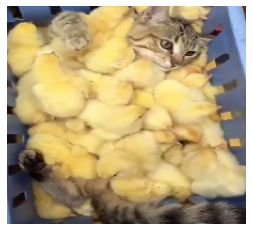

In [8]:
plt.imshow(np.array(img)[20:,:,:]);
plt.axis('off');

Shifting the image by 20 pixels does not change *anything*

### Convolution

By definition, the convolution operation applies a 'filter' $g$ over 'signal' $f$

$$
(f * g) [x] = \sum f[i] g[x-i]
$$

### Convolution in images

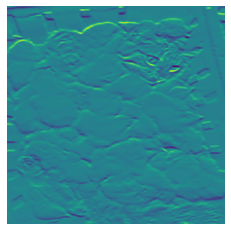

In [9]:
w = np.array(
    [[1, 1, 1],
     [0, 0, 0],
     [-1, -1, -1]]
)
grayscale = np.array(img).mean(axis=2)
from scipy.ndimage.filters import convolve
plt.imshow(convolve(grayscale, w));
plt.axis('off');

### Convolution

Convolution can do various kinds of image transformation: blur, edge detect, etc

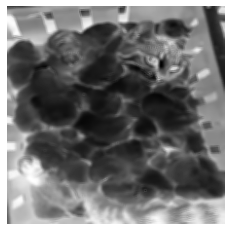

In [10]:
w = np.array(
    [[-1, -1, -1],
     [-1, 1, -1],
     [-1, -1, -1]]
)
grayscale = np.array(img).mean(axis=2)
from scipy.ndimage.filters import convolve
plt.imshow(convolve(grayscale, w), cmap=plt.cm.gray);
plt.axis('off');

### Convolutional Neural Network

- Instead of Dense/FC layers we compute 'feature maps' with convolutions
- We apply many different **learnable** convolutions

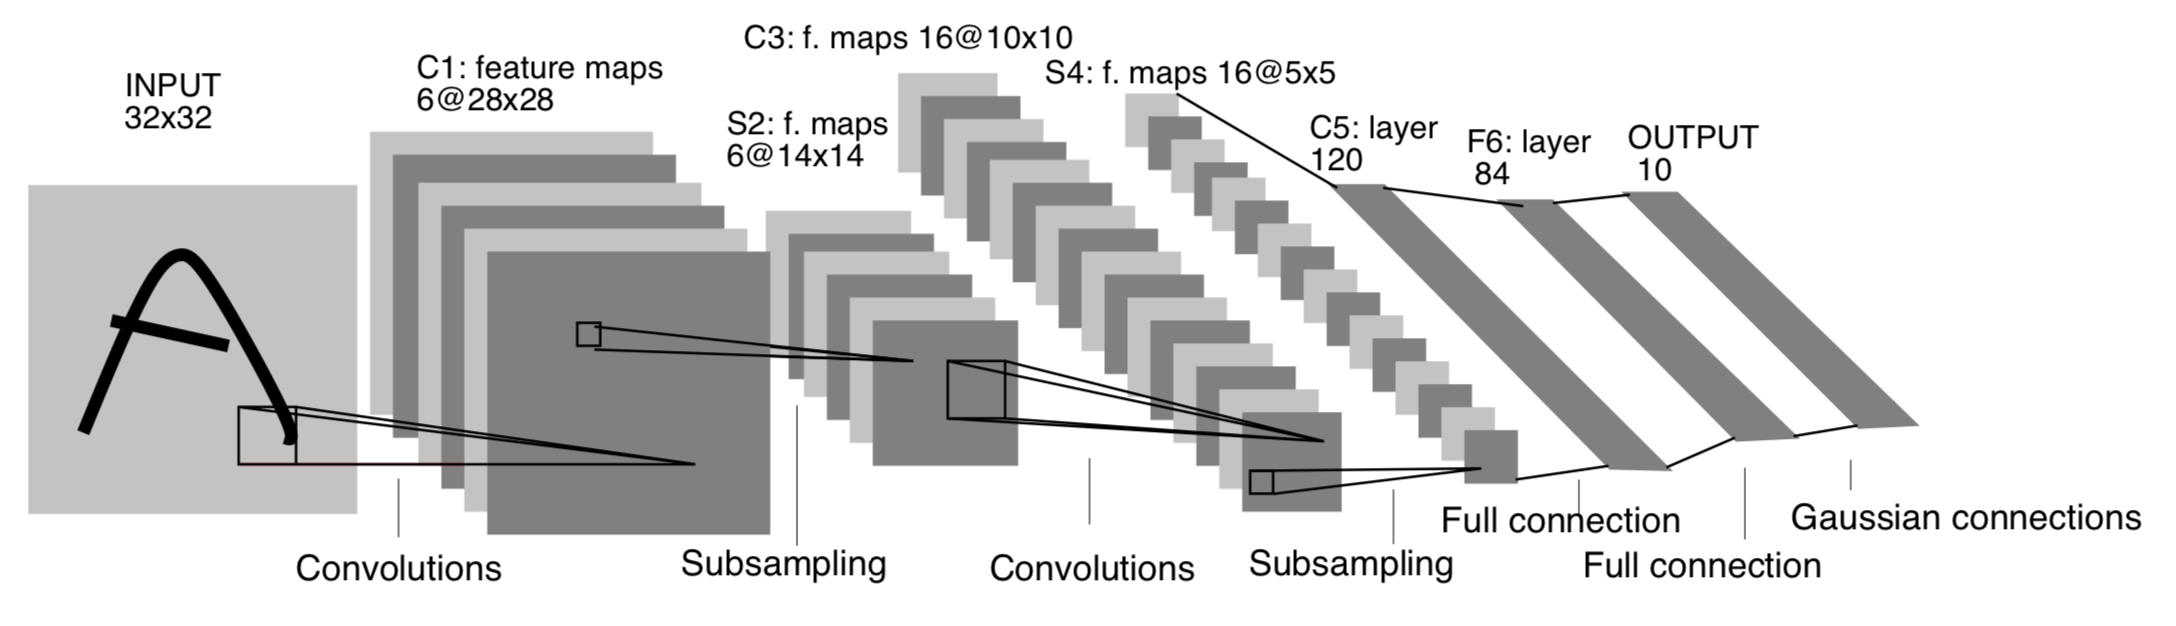

In [11]:
image.load_img('lenet.png')

### Pooling

- The convolution does not reduce the dimensionality
- Every feature map would only increase the amount of data
- To reduce, for each 2x2 local region we apply some 'pooling' e.g. max pooling:

$$
\begin{matrix} 2 & 1 \\ 0 & 1 \end{matrix} \to 2
$$

### CNN for MNIST

In [12]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

num_classes = 10
# input image dimensions
img_rows, img_cols = 28, 28
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
X_train_images = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
X_test_images = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [13]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import Sequential
num_classes = 10
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(16, activation='relu'))
cnn.add(Dense(num_classes, activation='softmax'))

### Fitting the CNN

In [14]:
cnn.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history = cnn.fit(X_train_images, y_train,
                  batch_size=512, epochs=10, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
54000/54000 [==============================] - 34s 626us/sample - loss: 3.1982 - acc: 0.3599 - val_loss: 1.4062 - val_acc: 0.4757
Epoch 2/10
54000/54000 [==============================] - 33s 619us/sample - loss: 1.2843 - acc: 0.5403 - val_loss: 1.0042 - val_acc: 0.6665
Epoch 3/10
54000/54000 [==============================] - 32s 600us/sample - loss: 0.6954 - acc: 0.7755 - val_loss: 0.2900 - val_acc: 0.9187
Epoch 4/10
54000/54000 [==============================] - 30s 560us/sample - loss: 0.2562 - acc: 0.9285 - val_loss: 0.1552 - val_acc: 0.9542
Epoch 5/10
54000/54000 [==============================] - 34s 633us/sample - loss: 0.1677 - acc: 0.9525 - val_loss: 0.1177 - val_acc: 0.9657
Epoch 6/10
54000/54000 [==============================] - 33s 618us/sample - loss: 0.1279 - acc: 0.9630 - val_loss: 0.0982 - val_acc: 0.9725
Epoch 7/10
54000/54000 [==============================] -

### Analyzing the history

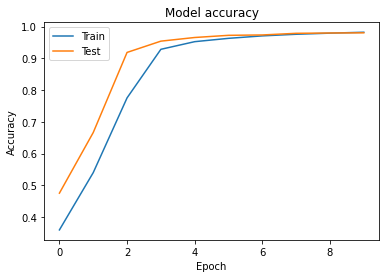

In [15]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


### Visualizing the convolution filters


A lot of things published e.g. in Distill:

https://distill.pub/2017/feature-visualization/

https://distill.pub/2019/activation-atlas/

### Spatial or temporal data

All the principles above work nicely with audio, video, and whatever similar data 

- Spatial data can be either 2D or 3D 
- Temporal data is usually 1D (time) or 2D (time-frequency spectrum)

### Training convolutional neural networks

- There are hundreds of different approaches
- You've got to get thousands of images
- A lot of practical tricks: optimizers, learning rates, fighting overfitting
- This pushes training CNNs out of the scope of the course

# The secret sauce

Not so secret anymore

### Pretrained networks

https://keras.io/applications/

In [16]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

model = ResNet50(weights='imagenet')

### ResNet50

One of the recent neural networks with a great classification performance

In [17]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

### Possible scenarios

- Just classify and use the predictions
- Re-use the features from some intermediate layer
- Fine-tune the existing network to solve a similar problem

### Classifying the image

In [18]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
print('Predicted:', [x[1] for x in decode_predictions(preds, top=10)[0]])

Predicted: ['pineapple', 'tabby', 'Egyptian_cat', 'tiger_cat', 'mashed_potato', 'toyshop', 'meat_loaf', 'hen-of-the-woods', 'hamper', 'lynx']


### Reusing the features

In [19]:
from tensorflow.keras.models import Model
features = Model(inputs=model.input, outputs=model.layers[-2].output).predict(x)
len(features[0]), features[0][:10]

(2048,
 array([0.32956988, 0.49642244, 2.378097  , 0.2849648 , 0.4537766 ,
        0.        , 0.        , 0.4559967 , 0.14823326, 0.0209045 ],
       dtype=float32))

We've got a 2048-d vector of features we can now feed into a classifier.

### Fine-tuning

We can add a layer on top of the neural network and train **only** this layer.

In [20]:
from tensorflow.keras.layers import Dense

x = model.layers[-2].output
x = Dense(2, activation='softmax')(x)
fine_tuned = Model(inputs=model.input, outputs=x)
for layer in model.layers:
    layer.trainable = False
fine_tuned.compile(optimizer='rmsprop', loss='categorical_crossentropy')
# fine_tuned.fit(...)

### Why does it work?

- The low-level layers learn the image features
- These essential features are very similar in different tasks
- The high-level features are either useful or can be slightly changed to become useful